## PS03 &mdash; Pasha pp. 7-9 to 7-12

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS
from astropy import units as u

from scipy.optimize import curve_fit

coord = SkyCoord.from_name('J140404.9+005953.3')
xid = SDSS.query_region(coord, spectro=True, radius=1*u.arcmin)
spectra = SDSS.get_spectra(matches=xid)[0]
spec = spectra[1].data

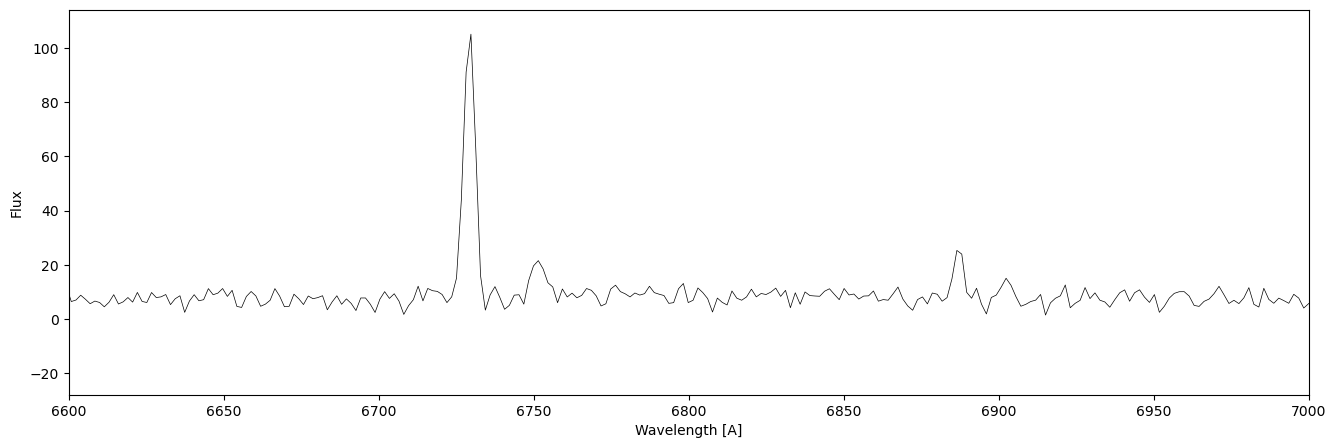

In [4]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(10**spec['loglam'], spec['flux'], lw=0.5, color='k')
ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Flux')
ax.set_xlim(6600, 7000);

### Eyeball the region we would like to use as 6700 to 6760

In [13]:
def gauss(x, amp, loc, sigma, offset):
    return amp * np.exp(-np.power(x-loc, 2.0)/(2*np.power(sigma, 2.0))) + offset

wl = 10**spec['loglam']

ind, = np.where((wl > 6700) & (wl < 6760))

wl_use = 10**spec['loglam'][ind]
fl_use = spec['flux'][ind]

res = curve_fit(f=gauss, xdata=wl_use, ydata=fl_use, p0=[100, 6730, 1.0, 10])
params = res[0]
params

array([1.00376275e+02, 6.72927952e+03, 1.73844468e+00, 9.24352781e+00])

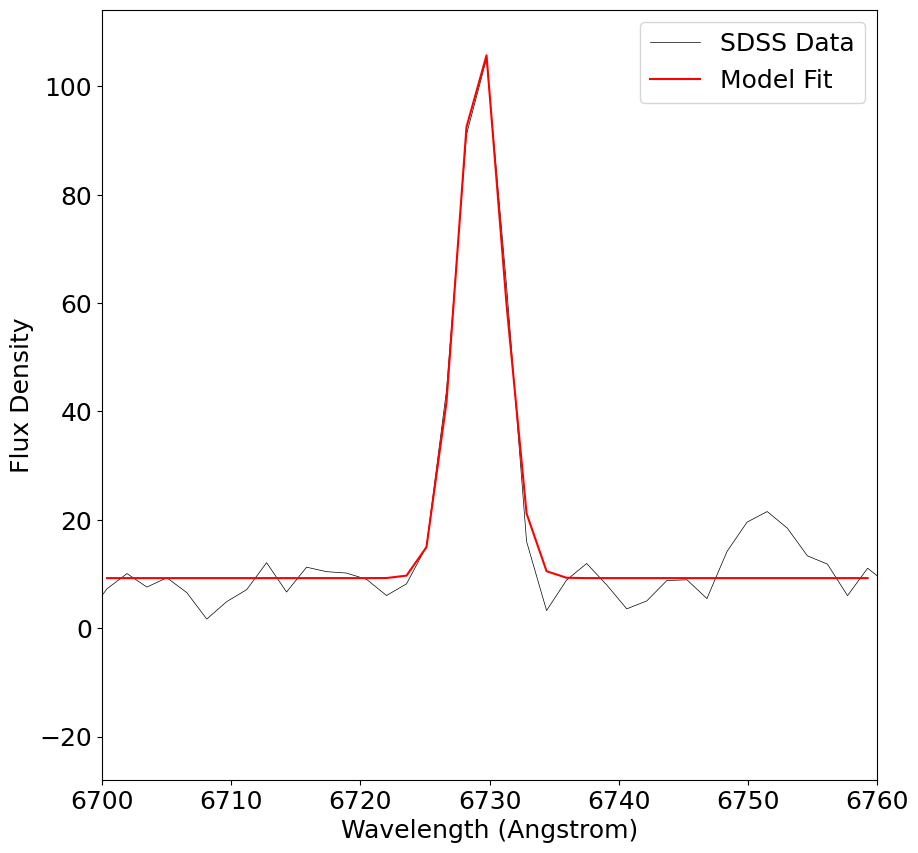

In [26]:
plt.rc("font", size=18, family='sans-serif')

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(10**spec['loglam'], spec['flux'], lw=0.5, color='k', label='SDSS Data')
ax.plot(wl_use, gauss(wl_use, *params), label='Model Fit', color='r')
ax.set_xlabel('Wavelength (Angstrom)')
ax.set_ylabel('Flux Density')
ax.legend()
ax.set_xlim(6700, 6760);


### Get z from Redshift

In [29]:
def z_from_lam(lam_emit, lam_measured):
    lam_shift = lam_measured / lam_emit
    return lam_shift - 1

z_from_lam(6564, params[1])

0.025179695522424606